In [42]:
import numpy as np
import pandas as pd
from tqdm import tqdm
%matplotlib inline

In [43]:
train = pd.read_csv("./train.csv")
test =pd.read_csv("./test.csv")

In [44]:
train.head(5)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


In [45]:
train.dtypes

key                                     int64
apartment_id                            int64
city                                    int64
transaction_year_month                  int64
transaction_date                       object
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
address_by_law                          int64
total_parking_capacity_in_site        float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
tallest_building_in_sites             float64
lowest_building_in_sites              float64
heat_type                              object
heat_fuel                              object
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type      int64
room_count                        

In [ ]:
drop = ['key','apartment_id','total_parking_capacity_in_site','heat_type','heat_fuel',
        'tallest_building_in_sites','lowest_building_in_sites','room_count','bathroom_count','front_door_structure']
train.drop(drop, axis=1,inplace=True)
test.drop(drop,axis=1, inplace=True)

outlier

In [ ]:
from scipy import stats
outlier = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

In [ ]:
outlier

In [6]:
all_ = train.append(test)
#train 1601458
#test start from 1601458

In [7]:
all_.head()

,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price
0,1,200601,11~20,1999,47.43,6,37.585965,127.000231,1111017100,136,1,91120,65.63,46,215000000
1,1,200601,11~20,1999,44.37,8,37.585965,127.000231,1111017100,136,1,91119,61.39,10,200000000
2,1,200601,11~20,1992,54.70,8,37.580511,127.014016,1111017400,585,5,8430,72.36,201,168000000
3,1,200601,11~20,1993,64.66,11,37.580324,127.011788,1111017400,919,7,5839,87.30,284,165000000
4,1,200601,11~20,1993,106.62,7,37.580324,127.011788,1111017400,919,7,5836,127.74,112,280000000


### Data preprocessing

transaction_year_month

In [8]:
ym = list(all_['transaction_year_month'])
cnt = 0
for i in tqdm(ym):
    transaction_year = int(str(i)[:4])
    transaction_month = int(str(i)[4:])
    ym[cnt] = [transaction_year,transaction_month]
    cnt +=1
    
ym = pd.DataFrame(ym, columns=['transaction_year', 'transaction_month'])
all_.drop('transaction_year_month',axis=1,inplace=True)

100%|██████████| 1605376/1605376 [00:15<00:00, 101628.39it/s]


In [9]:
ym.head()

,transaction_year,transaction_month
0,2006,1
1,2006,1
2,2006,1
3,2006,1
4,2006,1


In [10]:
all_.reset_index(drop=True, inplace=True)
ym.reset_index(drop=True, inplace=True)
all_=pd.concat([all_,ym],axis=1)

In [11]:
all_.head()

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price,transaction_year,transaction_month
0,1,11~20,1999,47.43,6,37.585965,127.000231,1111017100,136,1,91120,65.63,46,215000000,2006,1
1,1,11~20,1999,44.37,8,37.585965,127.000231,1111017100,136,1,91119,61.39,10,200000000,2006,1
2,1,11~20,1992,54.70,8,37.580511,127.014016,1111017400,585,5,8430,72.36,201,168000000,2006,1
3,1,11~20,1993,64.66,11,37.580324,127.011788,1111017400,919,7,5839,87.30,284,165000000,2006,1
4,1,11~20,1993,106.62,7,37.580324,127.011788,1111017400,919,7,5836,127.74,112,280000000,2006,1


In [12]:
trans_date = {'1~10':0,'11~20':1,'21~28':2, '21~29':2,'21~30':2, '21~31':2}
all_['transaction_date'] = [trans_date[i] for i in all_['transaction_date']]

In [13]:
all_.head()

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price,transaction_year,transaction_month
0,1,1,1999,47.43,6,37.585965,127.000231,1111017100,136,1,91120,65.63,46,215000000,2006,1
1,1,1,1999,44.37,8,37.585965,127.000231,1111017100,136,1,91119,61.39,10,200000000,2006,1
2,1,1,1992,54.70,8,37.580511,127.014016,1111017400,585,5,8430,72.36,201,168000000,2006,1
3,1,1,1993,64.66,11,37.580324,127.011788,1111017400,919,7,5839,87.30,284,165000000,2006,1
4,1,1,1993,106.62,7,37.580324,127.011788,1111017400,919,7,5836,127.74,112,280000000,2006,1


address

In [14]:
all_['address_by_law']

addr = list(all_['address_by_law'])
cnt = 0
for i in tqdm(addr):
    district = int(str(i)[2:5])
    street = int(str(i)[5:8])
    etc_address = int(str(i)[8:10])
    addr[cnt] = [district,street,etc_address]
    cnt +=1
    
addr = pd.DataFrame(addr, columns=['district', 'street', 'etc_address'])
all_ = pd.concat([all_, addr], axis=1)
all_.head(5)

100%|██████████| 1605376/1605376 [00:23<00:00, 68900.10it/s]


,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price,transaction_year,transaction_month,district,street,etc_address
0,1,1,1999,47.43,6,37.585965,127.000231,1111017100,136,1,91120,65.63,46,215000000,2006,1,110,171,0
1,1,1,1999,44.37,8,37.585965,127.000231,1111017100,136,1,91119,61.39,10,200000000,2006,1,110,171,0
2,1,1,1992,54.70,8,37.580511,127.014016,1111017400,585,5,8430,72.36,201,168000000,2006,1,110,174,0
3,1,1,1993,64.66,11,37.580324,127.011788,1111017400,919,7,5839,87.30,284,165000000,2006,1,110,174,0
4,1,1,1993,106.62,7,37.580324,127.011788,1111017400,919,7,5836,127.74,112,280000000,2006,1,110,174,0


In [15]:
all_.drop('address_by_law',axis=1,inplace=True)

In [16]:
all_.isnull().any()

city                                  False
transaction_date                      False
year_of_completion                    False
exclusive_use_area                    False
floor                                 False
latitude                              False
longitude                             False
total_household_count_in_sites        False
apartment_building_count_in_sites     False
room_id                               False
supply_area                           False
total_household_count_of_area_type    False
transaction_real_price                False
transaction_year                      False
transaction_month                     False
district                              False
street                                False
etc_address                           False
dtype: bool

In [17]:
all_.dtypes

city                                    int64
transaction_date                        int64
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type      int64
transaction_real_price                  int64
transaction_year                        int64
transaction_month                       int64
district                                int64
street                                  int64
etc_address                             int64
dtype: object

x, y split

In [18]:
all_.sample(n=5)

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price,transaction_year,transaction_month,district,street,etc_address
1485187,1,1,1984,54.81,5,37.552700,127.148545,2400,18,4184,76.44,495,558000000,2017,11,740,101,0
1068189,0,1,1989,66.56,15,35.161129,129.032632,2716,20,26325,92.74,180,170000000,2015,5,230,109,0
93918,1,1,1994,59.04,5,37.574298,126.817491,387,3,4642,77.96,119,179000000,2006,10,500,109,0
1344154,1,0,2010,59.99,11,37.607562,127.017944,1497,25,15226,85.55,122,463000000,2016,11,290,134,0
870631,0,0,2012,124.47,2,35.083138,128.908718,414,17,52043,152.13,80,346500000,2014,2,440,104,0


In [19]:
all_Y = all_['transaction_real_price']
no_norm_Y = all_['transaction_real_price'][:1601458]
all_.drop(['transaction_real_price'], axis=1,inplace=True)
no_normalization = all_
all_=((all_-all_.min())/(all_.max()-all_.min()))
all_.sample(n=5)

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_year,transaction_month,district,street,etc_address
584888,0.0,0.5,0.767857,0.396019,0.309524,0.049047,0.953618,0.392166,0.105691,0.195101,0.363923,0.129730,0.416667,0.090909,0.380952,0.013100,0.0
315671,1.0,1.0,0.732143,0.051118,0.178571,0.926423,0.107975,0.028677,0.000000,0.864278,0.047334,0.000676,0.166667,0.636364,0.857143,0.030568,0.0
273159,0.0,0.5,0.553571,0.245321,0.095238,0.013392,0.923721,0.016260,0.000000,0.211534,0.207364,0.038176,0.166667,0.272727,0.142857,0.052402,0.0
1347063,1.0,0.0,0.946429,0.324583,0.285714,0.921396,0.157879,0.066519,0.048780,0.101218,0.298066,0.027703,0.833333,0.909091,0.952381,0.034934,0.0
60354,1.0,0.5,0.678571,0.155370,0.107143,0.940136,0.061960,0.129638,0.097561,0.765443,0.136077,0.083108,0.000000,0.545455,0.714286,0.056769,0.0


In [20]:
#train 1601458
#test start from 1601458
train = all_[:1601458]
no_normalization_train = no_normalization[:1601458]

In [21]:
train.head()

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_year,transaction_month,district,street,etc_address
0,1.0,0.5,0.660714,0.111218,0.119048,0.961473,0.101869,0.005469,0.00000,0.473926,0.112894,0.015541,0.0,0.0,0.0,0.305677,0.0
1,1.0,0.5,0.660714,0.100252,0.142857,0.961473,0.101869,0.005469,0.00000,0.473920,0.102380,0.003378,0.0,0.0,0.0,0.305677,0.0
2,1.0,0.5,0.535714,0.137272,0.142857,0.959406,0.107402,0.071840,0.03252,0.043784,0.129581,0.067905,0.0,0.0,0.0,0.318777,0.0
3,1.0,0.5,0.553571,0.172966,0.178571,0.959335,0.106508,0.121212,0.04878,0.030306,0.166625,0.095946,0.0,0.0,0.0,0.318777,0.0
4,1.0,0.5,0.553571,0.323339,0.130952,0.959335,0.106508,0.121212,0.04878,0.030290,0.266898,0.037838,0.0,0.0,0.0,0.318777,0.0


In [22]:
test = all_[1601458:]
no_normalization_test = no_normalization[1601458:]

In [23]:
test.head()

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_year,transaction_month,district,street,etc_address
1601458,1.0,1.0,0.392857,0.240770,0.214286,0.936447,0.122857,0.040798,0.02439,0.034514,0.215943,0.000676,0.250000,1.000000,0.904762,0.013100,0.0
1601459,1.0,0.0,0.107143,0.325311,0.166667,0.956262,0.096816,0.007391,0.00000,0.240175,0.215894,0.003378,0.583333,0.272727,0.000000,0.157205,0.0
1601460,1.0,1.0,0.107143,0.070865,0.119048,0.955448,0.106047,0.003104,0.02439,0.236825,0.048500,0.019595,0.583333,0.727273,0.000000,0.318777,0.0
1601461,1.0,0.0,0.803571,0.104910,0.142857,0.950473,0.045277,0.047302,0.00000,0.099127,0.166154,0.000338,0.583333,1.000000,0.619048,0.004367,0.0
1601462,1.0,0.0,0.464286,0.091221,0.095238,0.986594,0.134694,0.016408,0.00813,0.003594,0.090751,0.030405,0.666667,0.000000,0.380952,0.021834,0.0


In [24]:
print(all_Y[:1601458].min(),all_Y[:1601458].max())
Y=((all_Y[:1601458]-all_Y[:1601458].min())/(all_Y[:1601458].max()-all_Y[:1601458].min()))
Y.head()

7000000 8200000000


0    0.025388
1    0.023557
2    0.019651
3    0.019285
4    0.033321
Name: transaction_real_price, dtype: float64

In [25]:
train.head()

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_year,transaction_month,district,street,etc_address
0,1.0,0.5,0.660714,0.111218,0.119048,0.961473,0.101869,0.005469,0.00000,0.473926,0.112894,0.015541,0.0,0.0,0.0,0.305677,0.0
1,1.0,0.5,0.660714,0.100252,0.142857,0.961473,0.101869,0.005469,0.00000,0.473920,0.102380,0.003378,0.0,0.0,0.0,0.305677,0.0
2,1.0,0.5,0.535714,0.137272,0.142857,0.959406,0.107402,0.071840,0.03252,0.043784,0.129581,0.067905,0.0,0.0,0.0,0.318777,0.0
3,1.0,0.5,0.553571,0.172966,0.178571,0.959335,0.106508,0.121212,0.04878,0.030306,0.166625,0.095946,0.0,0.0,0.0,0.318777,0.0
4,1.0,0.5,0.553571,0.323339,0.130952,0.959335,0.106508,0.121212,0.04878,0.030290,0.266898,0.037838,0.0,0.0,0.0,0.318777,0.0


In [26]:
X = np.asarray(train.values)
X = X.astype(np.float64) 
Y = Y.astype(np.float64) 

In [27]:
X[0],Y[0]

(array([ 1.        ,  0.5       ,  0.66071429,  0.11121783,  0.11904762,
         0.96147258,  0.1018687 ,  0.00546933,  0.        ,  0.47392569,
         0.11289363,  0.01554054,  0.        ,  0.        ,  0.        ,
         0.30567686,  0.        ]), 0.025387525936775297)

In [28]:
no_norm_X = (no_normalization_train.values).astype(np.float64) 
no_norm_Y = no_norm_Y.astype(np.float64) 

In [29]:
no_norm_X[0],no_norm_Y[0]

(array([  1.00000000e+00,   1.00000000e+00,   1.99900000e+03,
          4.74300000e+01,   6.00000000e+00,   3.75859651e+01,
          1.27000231e+02,   1.36000000e+02,   1.00000000e+00,
          9.11200000e+04,   6.56300000e+01,   4.60000000e+01,
          2.00600000e+03,   1.00000000e+00,   1.10000000e+02,
          1.71000000e+02,   0.00000000e+00]), 215000000.0)

### DNN Model

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [32]:
model = Sequential()

model.add(Dense(200, input_shape=(17,),activation='sigmoid'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(200,init='random_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(1,init='random_normal', activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="random_normal")`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="random_normal")`
  del sys.path[0]


In [33]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["mse"])

In [36]:
#training
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
hist = model.fit(X, Y, batch_size = 4, epochs = 100,callbacks=[early_stopping])

Epoch 1/100
1601458/1601458 [==============================] - 1371s 856us/step - loss: 0.0164 - mean_squared_error: 7.3982e-04
Epoch 2/100


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1601458/1601458 [==============================] - 1292s 807us/step - loss: 0.0141 - mean_squared_error: 5.8283e-04
Epoch 3/100
1601458/1601458 [==============================] - 1318s 823us/step - loss: 0.0131 - mean_squared_error: 5.2877e-04
Epoch 4/100
1601458/1601458 [==============================] - 1239s 774us/step - loss: 0.0127 - mean_squared_error: 4.9597e-04
Epoch 5/100
1601458/1601458 [==============================] - 1233s 770us/step - loss: 0.0124 - mean_squared_error: 4.7653e-04
Epoch 6/100
1601458/1601458 [==============================] - 1229s 767us/step - loss: 0.0121 - mean_squared_error: 4.5793e-04
Epoch 7/100
1601458/1601458 [==============================] - 1228s 767us/step - loss: 0.0119 - mean_squared_error: 4.4314e-04
Epoch 8/100
1601458/1601458 [==============================] - 1231s 769us/step - loss: 0.0118 - mean_squared_error: 4.2961e-04
Epoch 9/100
1601458/1601458 [==============================] - 1229s 768us/step - loss: 0.0116 - mean_squared_error:

KeyboardInterrupt: 

In [ ]:
#saving model
model_json = model.to_json()
with open("dnn.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("dnn.h5")
print("Saved model to disk")

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_relu.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

In [ ]:
test.head()

In [ ]:
min_ = 7000000
max_ = 8200000000
def price(x):
    return x*(max_-min_)+min_

In [ ]:
train.head()

In [ ]:
X[0]

In [ ]:
a = price(model.predict(X[0:4]))
b = price(Y[0:4])
for i in range(0,4):
    print(a[i],b[i])

In [ ]:
Dt = test.values
price(model.predict(Dt[0:4]))

### DNN relu no normalization

In [229]:
model = Sequential()

model.add(Dense(200, init='random_normal',input_shape=(17,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(200,init='random_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1,init='random_normal', activation='relu'))

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

model.compile(optimizer = "sgd", loss = root_mean_squared_error, 
              metrics =["mse"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_shape=(17,), kernel_initializer="random_normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="random_normal")`
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="random_normal")`
  # This is added back by InteractiveShellApp.init_path()


In [230]:
hist_relu = model.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50
1601458/1601458 [==============================] - 210s 131us/step - loss: 199301818.5128 - mean_squared_error: 106006294039254176.0000
Epoch 2/50
1601458/1601458 [==============================] - 208s 130us/step - loss: 170574753.2461 - mean_squared_error: 80393950582064304.0000
Epoch 3/50
1601458/1601458 [==============================] - 208s 130us/step - loss: 149125514.7620 - mean_squared_error: 64126329807719424.0000
Epoch 4/50
1601458/1601458 [==============================] - 217s 135us/step - loss: 142329428.1120 - mean_squared_error: 58421411043783384.0000
Epoch 5/50
1601458/1601458 [==============================] - 217s 135us/step - loss: 137244776.3326 - mean_squared_error: 55280799637417560.0000
Epoch 6/50
1601458/1601458 [==============================] - 212s 132us/step - loss: 132743166.2863 - mean_squared_error: 52710032442789856.0000
Epoch 7/50
1601458/1601458 [==============================] - 217s 135us/step - loss: 129850466.9318 - mean_squared_error: 

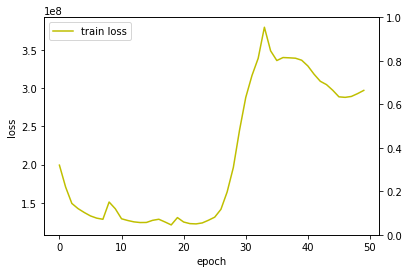

In [233]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_relu.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

In [232]:
dnn_r = model.predict(no_norm_X)
n=8
print("  pred           y           diff ")
error = 0
for i in range(0,n):
    print(dnn_r[i]," ",no_norm_Y[i]," ",int((no_norm_Y[i]-dnn_r[i])/100000),"십만")
    error += abs(no_norm_Y[i]-dnn_r[i])
print(int(error/100000), '십만')

  pred           y           diff 
[ 0.]   215000000.0   2150 십만
[ 0.]   200000000.0   2000 십만
[ 0.]   168000000.0   1680 십만
[ 0.]   165000000.0   1650 십만
[ 0.]   280000000.0   2800 십만
[ 0.]   415000000.0   4150 십만
[ 0.]   267000000.0   2670 십만
[ 0.]   415000000.0   4150 십만
21250 십만


### Regression

In [448]:
y_  = Y.transpose()
print(y_.shape,Y.shape,Y.T.shape)
print(X.shape,X.T.shape)

(1601458,) (1601458,) (1601458,)
(1601458, 17) (17, 1601458)


In [504]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.05)
clf.fit(no_norm_X, no_norm_Y)
print(clf.coef_)
print(clf.intercept_)  

[  2.61907410e+09   2.29444374e+06  -2.00603846e+06   1.17908318e+06
   3.59075955e+06  -6.30731164e+08   4.22363253e+08  -1.92585578e+04
   5.73281335e+06   4.01714400e+02   3.98360965e+06  -3.08789560e+04
   1.69555403e+07   1.78827385e+06   3.37582876e+05   1.61502398e+06
  -1.44210584e+07]
-63109657779.5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [505]:
clf.predict(X)

array([ -6.10526654e+10,  -6.10526343e+10,  -6.10483868e+10, ...,
        -6.27121960e+10,  -6.10033445e+10,  -6.10339242e+10])

In [510]:
no_norm_Y[:3]

0    215000000.0
1    200000000.0
2    168000000.0
Name: transaction_real_price, dtype: float64

### linear regression

In [495]:
from sklearn import linear_model
linear_regression_model = linear_model.LinearRegression()

In [496]:
no_norm_X.shape,no_norm_Y.shape

((1601458, 17), (1601458,))

In [497]:
linear_regression_model.fit(no_norm_X, no_norm_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [501]:
print(linear_regression_model.coef_)

[  3.60301735e+09   2.24824877e+06  -1.98377681e+06   9.92322737e+05
   3.42201040e+06  -9.17393566e+08   5.62704111e+08  -2.03015266e+04
   5.73296030e+06   4.04074782e+02   4.10315001e+06  -2.98780634e+04
   1.69404304e+07   1.81191587e+06   2.82424563e+05   1.38432680e+06
  -1.15693616e+07]


In [508]:
lgm_result = linear_regression_model.predict(no_norm_X)

In [509]:
print(lgm_result[:5],no_norm_Y[:5])

[  1.40733641e+08   1.28219005e+08   1.88977661e+08   2.68520867e+08
   4.67539889e+08] 0    215000000.0
1    200000000.0
2    168000000.0
3    165000000.0
4    280000000.0
Name: transaction_real_price, dtype: float64


### Random Forest regression

In [312]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10,verbose=1,n_jobs=4)

In [313]:
rfr.fit(no_norm_X, no_norm_Y)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.2min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [314]:
rfr_result = rfr.predict(no_norm_X)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.9s finished


In [315]:
n=5
print("  pred           y           diff ")
error = 0
for i in range(0,n):
    print(rfr_result[i]," ",no_norm_Y[i]," ",int((no_norm_Y[i]-rfr_result[i])/100000),"십만")
    error += abs(no_norm_Y[i]-rfr_result[i])
print(int(error/100000), '십만')

  pred           y           diff 
218000000.0   215000000.0   -30 십만
164800000.0   200000000.0   352 십만
164350000.0   168000000.0   36 십만
161900000.0   165000000.0   31 십만
288300000.0   280000000.0   -83 십만
532 십만


In [316]:
print("Accuracy --> ", rfr.score(no_norm_X, no_norm_Y)*100)

Accuracy -->  99.8046044833


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.2s finished


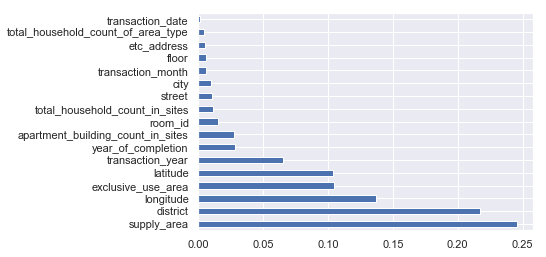

In [321]:
feat_importances = pd.Series(rfr.feature_importances_, index=train.columns)
feat_importances.nlargest(17).plot(kind='barh')

### XGBoost

In [344]:
import xgboost as xgb
from xgboost import plot_tree

model_xgb = xgb.XGBRegressor(n_estimators=10,
                             max_depth=100,
                             learning_rate=0.8,
                             n_jobs=16,
                             verbose_eval=5,
                             silent=False, ) 


In [345]:
model_xgb.fit(no_norm_X, no_norm_Y)

[03:01:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16640 extra nodes, 0 pruned nodes, max_depth=28
[03:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222570 extra nodes, 0 pruned nodes, max_depth=100
[03:03:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1038456 extra nodes, 0 pruned nodes, max_depth=100
[03:05:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1517974 extra nodes, 0 pruned nodes, max_depth=100
[03:06:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1753610 extra nodes, 0 pruned nodes, max_depth=100
[03:08:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1900456 extra nodes, 0 pruned nodes, max_depth=100
[03:10:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2000174 extra nodes, 0 pruned nodes, max_depth=100
[03:12:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2078664 extra nodes, 0 pruned nodes, max_depth=100
[03:14:07] src/tree/updater_prune.cc:74: tree prunin

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=100, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=16, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1, verbose_eval=5)

In [346]:
model_xgb.score(no_norm_X,no_norm_Y)

0.99987223656346469

### SVR 

In [ ]:
from sklearn import svm
svr_opt = svm.SVR(C = 100000, gamma = 1e-08)

svr = svr_opt.fit(no_norm_X, no_norm_Y,verbose=True)

### PCA + regression

In [256]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(no_norm_X)
pca_X = pca.transform(no_norm_X)
print("original shape:   ", no_norm_X.shape)
print("transformed shape:", pca_X.shape)

original shape:    (1601458, 17)
transformed shape: (1601458, 2)


In [260]:
pca_X

array([[  56311.20373729,    -825.57057192],
       [  56310.23260846,    -830.96911564],
       [ -26380.06427412,    -726.96095221],
       ..., 
       [  21229.13689958,     223.92596208],
       [ 131010.4458369 ,    -516.11404605],
       [ -28532.30195768,    -460.16659087]])

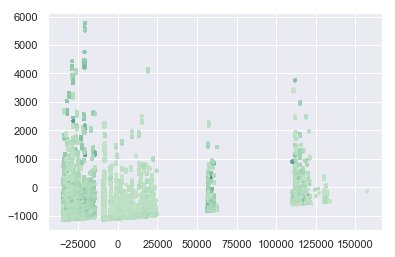

In [289]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)
n=1600000
plt.scatter(pca_X[:,0][:n], pca_X[:,1][:n], c=no_norm_Y.values[:n], s=5, cmap=cmap)
plt.show()

##### PCA + RandomForestRegressor,RFR

In [296]:
from sklearn.ensemble import RandomForestRegressor
pca_rfr = RandomForestRegressor(n_estimators=20,verbose=1,n_jobs=4)

In [297]:
pca_rfr.fit(pca_X, no_norm_Y)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   58.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=4,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [299]:
pca_rfr_result = pca_rfr.predict(pca_X)
n=5
print("  pred           y           diff ")
error = 0
for i in range(0,n):
    print(pca_rfr_result[i]," ",no_norm_Y[i]," ",int((no_norm_Y[i]-pca_rfr_result[i])/100000),"십만")
    error += abs(no_norm_Y[i]-pca_rfr_result[i])
print(int(error/100000), '십만')

  pred           y           diff 
222550000.0   215000000.0   -75 십만
219450000.0   200000000.0   -194 십만
247040714.286   168000000.0   -790 십만
246250000.0   165000000.0   -812 십만
388900000.0   280000000.0   -1089 십만
2961 십만


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    9.3s finished


##### PCA + XGBoost

In [307]:
import xgboost as xgb
from xgboost import plot_tree

pca_xgb = xgb.XGBRegressor(n_estimators=10,
                             max_depth=60,
                             learning_rate=0.5,
                             n_jobs=16,
                             verbose_eval=5,
                             silent=False, ) 


In [308]:
pca_xgb.fit(pca_X, no_norm_Y)

[00:52:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34764 extra nodes, 0 pruned nodes, max_depth=60
[00:52:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242488 extra nodes, 0 pruned nodes, max_depth=60
[00:52:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1311074 extra nodes, 0 pruned nodes, max_depth=60
[00:53:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2453762 extra nodes, 0 pruned nodes, max_depth=60
[00:53:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2610056 extra nodes, 0 pruned nodes, max_depth=60
[00:53:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2130038 extra nodes, 0 pruned nodes, max_depth=60
[00:54:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1481086 extra nodes, 0 pruned nodes, max_depth=60
[00:54:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 850052 extra nodes, 0 pruned nodes, max_depth=60
[00:54:33] src/tree/updater_prune.cc:74: tree pruning end, 1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=60, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=16, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1, verbose_eval=5)

In [309]:
pca_xgb_result = pca_xgb.predict(pca_X)
n=5
print("  pred           y           diff ")
error = 0
for i in range(0,n):
    print(pca_xgb_result[i]," ",no_norm_Y[i]," ",int((no_norm_Y[i]-pca_xgb_result[i])/100000),"십만")
    error += abs(no_norm_Y[i]-pca_xgb_result[i])
print(int(error/100000), '십만')

  pred           y           diff 
2.29186e+08   215000000.0   -141 십만
2.03122e+08   200000000.0   -31 십만
2.64839e+08   168000000.0   -968 십만
2.2051e+08   165000000.0   -555 십만
4.11637e+08   280000000.0   -1316 십만
3012 십만


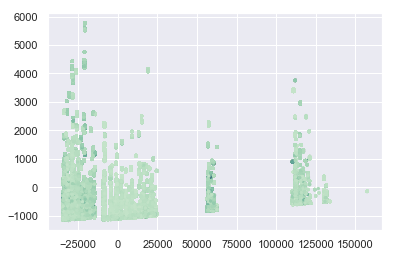

In [310]:
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)
n=1600000
plt.scatter(pca_X[:,0][:n], pca_X[:,1][:n], c=pca_xgb_result[:n], s=5, cmap=cmap)
plt.show()

## SUBMISSION

In [553]:
no_normalization_test.head()

,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_year,transaction_month,district,street,etc_address
1601458,1,2,1984,83.58,14,37.519926,127.052515,375,4,6648,107.19,2,2009,12,680,104,0
1601459,1,0,1968,107.17,10,37.572215,126.987643,149,1,46184,107.17,10,2013,4,110,137,0
1601460,1,2,1968,36.17,6,37.570067,127.010640,120,4,45540,39.66,58,2013,9,110,174,0
1601461,1,0,2007,45.67,8,37.556938,126.859255,419,1,19069,87.11,1,2013,12,500,102,0
1601462,1,0,1988,41.85,4,37.652256,127.082003,210,2,704,56.70,90,2014,1,350,106,0


In [83]:
rfr_re = rfr.predict(no_normalization_test.values)
rfr_re

NameError: name 'rfr' is not defined

In [647]:
result = GBR.predict(no_normalization_test.values)
result

array([  6.79622773e+08,   5.30454659e+08,   2.66530029e+08, ...,
         3.17625813e+08,   4.43753609e+08,   3.33158881e+08])

In [209]:
xgb_result = model_xgb.predict(no_normalization_test.values)
xgb_result[:5]

array([  8.35946112e+08,   3.79551456e+08,   1.15425792e+08,
         2.27313584e+08,   1.43140416e+08], dtype=float32)

In [210]:
sub = pd.read_csv('./submission.csv')

In [211]:
sub.head()

,key,transaction_real_price
0,462533,0
1,764018,0
2,813528,0
3,845097,0
4,856338,0


In [213]:
sub['transaction_real_price'] = xgb_result

In [214]:
sub.head()

,key,transaction_real_price
0,462533,835946112.0
1,764018,379551456.0
2,813528,115425792.0
3,845097,227313584.0
4,856338,143140416.0


In [216]:
sub.to_csv("xgb_result.csv", mode='w',index=False)
